In [42]:
import numpy as np
from scipy.io import wavfile
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.fft import rfft, rfftfreq
from scipy.signal import find_peaks

In [138]:
tube_lengths = np.array([313, 296, 275, 255, 235, 215, 195, 175, 155, 135, 115, 95, 75]) * 1e-3
tube_length_err = 0.5 * 1e-3

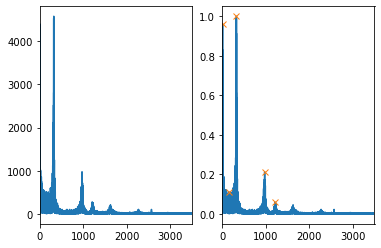

In [166]:
tube_lengths = np.array([255]) * 1e-3
for tube_length in tube_lengths:
    # Load the file.
    rate, audio = wavfile.read('../Data/' + str(int(tube_length * 1e3)) + '.wav')
    audio_N = audio.shape[0]
    audio_len = audio_N / rate
    audio_norm = audio / np.max(audio)
    
    # Make a subplot
    fig, axs = plt.subplots(1,2)
    
    # Calculate the Fourier Transform and plot it, up to 3.5kHz
    freqs = rfftfreq(audio_N, 1 / rate)
    audio_ft = np.abs(rfft(audio_norm))
    axs[0].plot(freqs, audio_ft)
    axs[0].set_xlim(0, 3500)
    
    # Normalize the Fourier Transform
    ft_norm = audio_ft / np.max(audio_ft)
    
    # Find peaks
    peaksi, _ = find_peaks(ft_norm, prominence=0.05, distance=800)
    peak_freqs = freqs[peaksi]
    peak_values = ft_norm[peaksi]
    axs[1].plot(freqs, ft_norm)
    axs[1].plot(peak_freqs, peak_values, 'x')
    axs[1].set_xlim(0, 3500)
    
    # Print out a table
    peak_freqs